<a href="https://colab.research.google.com/github/xoxoreyniel/DSC1105/blob/main/Lab_FA3__Awit%2C_JT%3B_Deloyola%2C_JR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [ ]:
library(ggplot2)
data(mpg)

**Part 1: Exploratory Data Analysis**

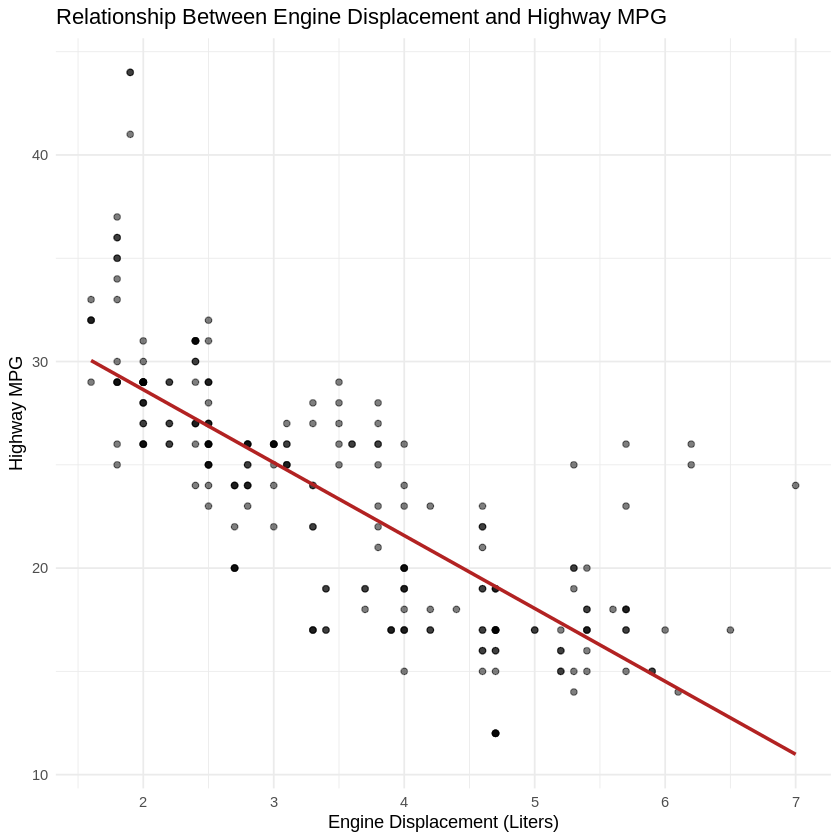

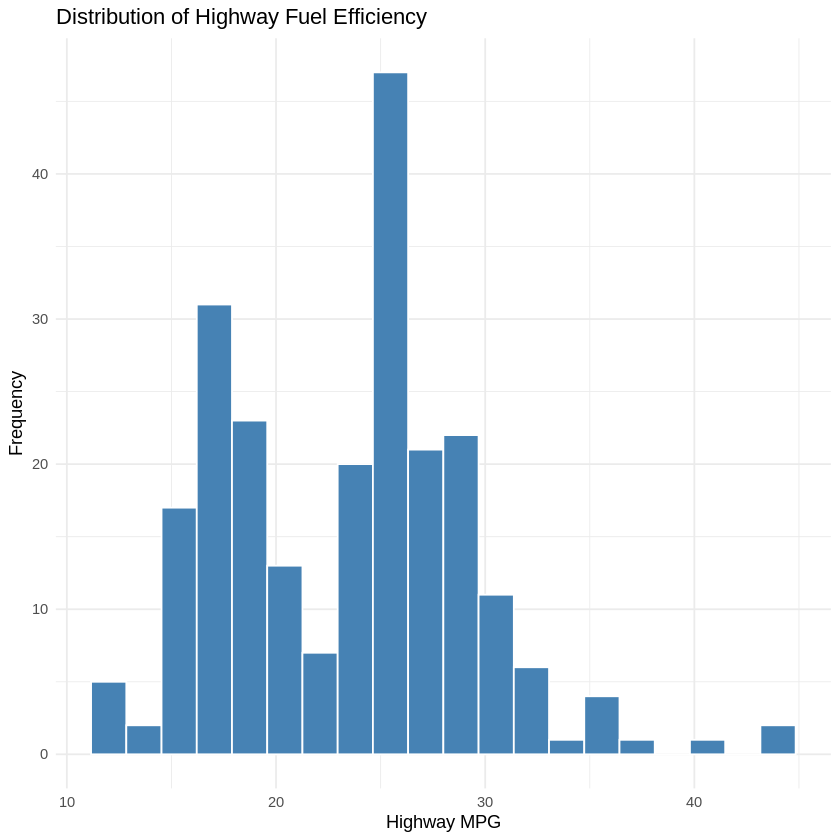

In [32]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "firebrick") +
  labs(title = "Relationship Between Engine Displacement and Highway MPG",
       x = "Engine Displacement (Liters)",
       y = "Highway MPG") +
  theme_minimal()

#Plot of histogram of hwy
ggplot(mpg, aes(x = hwy)) +
  geom_histogram(bins = 20, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Highway Fuel Efficiency",
       x = "Highway MPG",
       y = "Frequency") +
  theme_minimal()


**Part 2: Building a Simple Linear Model**

In [ ]:
#simple linear regression model
hwy_model <- lm(hwy ~ displ, data = mpg)

#coefficients
summary(hwy_model)


Call:
lm(formula = hwy ~ displ, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1039 -2.1646 -0.2242  2.0589 15.0105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.6977     0.7204   49.55   <2e-16 ***
displ        -3.5306     0.1945  -18.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.836 on 232 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.585 
F-statistic: 329.5 on 1 and 232 DF,  p-value: < 2.2e-16


Fitted Model Equation:

$$\widehat{hwy} = 35.70 - 3.53 \times displ$$

*For the Slope:* The highway fuel efficiency is expected to decrease by approximately 3.53 MPG for every 1-liter increase in engine displacement. This negative relationship occurs as larger engines typically consume more fuel.

*For the Intercept:* The intercept represents the predicted highway MPG when engine displacement is 0 liters, which is 35.70 MPG.

**Part 3: Model Assumptions and Diagnostics**

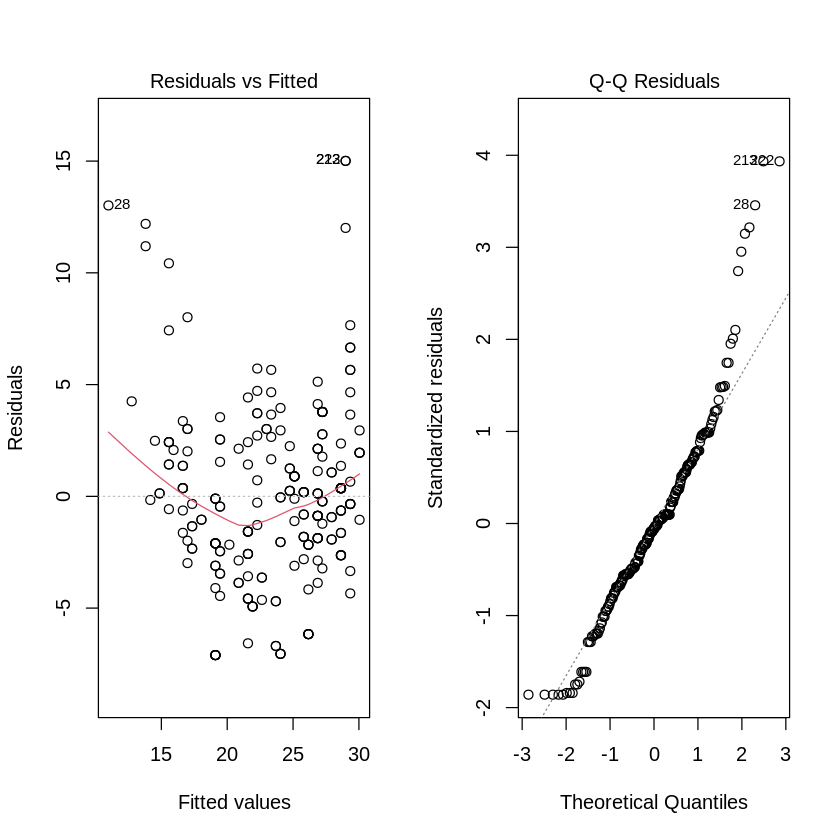

In [ ]:
#see the main plots side-by-side
par(mfrow = c(1, 2))

#Plot 1: Residuals vs Fitted
#Plot 2: Normal Q-Q
plot(hwy_model, which = 1:2)

This assumption is **not fully satisfied**. The Residuals vs. Fitted plot typically shows a slight curve in the red line, suggesting that the relationship between displacement and MPG is not perfectly linear.

This assumption is **mostly satisfied**, but with some concern. In the Normal Q-Q plot, most points follow the diagonal line, but there is usually "drifting" at the upper end, meaning the model struggles with a few outliers.

This assumption is **not satisfied**. The Residuals vs. Fitted plot often displays a "fan" shape, where the spread of residuals increases as displacement increases, indicating that the model's error is not consistent across all engine sizes.

**Part 4: Transformation or Model Critique**

In [ ]:
#Fit the transformed model
log_model <- lm(log(hwy) ~ displ, data = mpg)

#Compare Summaries
summary(hwy_model) # Original
summary(log_model) # Transformed


Call:
lm(formula = hwy ~ displ, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1039 -2.1646 -0.2242  2.0589 15.0105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.6977     0.7204   49.55   <2e-16 ***
displ        -3.5306     0.1945  -18.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.836 on 232 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.585 
F-statistic: 329.5 on 1 and 232 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(hwy) ~ displ, data = mpg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44570 -0.09390  0.00302  0.09476  0.60492 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.661092   0.031201  117.34   <2e-16 ***
displ       -0.155422   0.008425  -18.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1661 on 232 degrees of freedom
Multiple R-squared:  0.5946,	Adjusted R-squared:  0.5929 
F-statistic: 340.3 on 1 and 232 DF,  p-value: < 2.2e-16


*For the comparison:* The log-transformed model generally provides a better fit, often resulting in a higher Adjusted $R^2$ and more "random" looking residuals in the diagnostic plots.

*For the limitations:* Even with a transformation, a simple linear model is limited because it only uses one predictor. In reality, highway MPG is heavily influenced by other factors in the dataset, such as the vehicle's class (SUV vs. Compact) or drv (train type), which this model ignores.

**Part 5: Reflection**

The main objective of this analysis was to model the relationship between engine displacement (displ) and highway fuel efficiency (hwy) using the mpg dataset. While the initial model showed a clear negative correlation, diagnostic testing revealed significant violations of linearity and constant variance, as evidenced by a curved pattern and "fan" shape in the residuals. To address these issues, a log transformation was applied to the response variable, which successfully linearized the relationship and stabilized the error variance. This transformation resulted in a more statistically sound model where changes in engine size are interpreted as proportional percentage changes in fuel efficiency. Despite these improvements, the model remains limited in its predictive scope, particularly for specialized vehicle classes like sports cars or heavy-duty SUVs that do not follow standard displacement-to-efficiency ratios.